Name: Feifan Gu /
Github Username: Feifan126 /
USC ID: 8135699631

#### 1. Tree-Based Methods

(a) Download the APS Failure data

In [1]:
import pandas as pd

test_file_path = "../data/aps_failure_test_set.csv"
train_file_path = "../data/aps_failure_training_set.csv"

test_data = pd.read_csv(test_file_path, skiprows=20)
train_data = pd.read_csv(train_file_path, skiprows=20)

print("\nTest Data Head:")
print(test_data.head())

print("\nTrain Data Head:")
print(train_data.head())


Test Data Head:
  class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3

(b) Data Preparation

i. Research what types of techniques are usually used for dealing with data with
missing values. Pick at least one of them and apply it to this data in the
next steps.

Data imputation techniques include:

Dropping Missing Values – Only suitable when missing data is minimal, which is not ideal for this dataset.

Mean/Median/Mode Imputation – Filling missing values with the column's mean, median, or mode; useful for stable data distributions.

Forward/Backward Fill – Suitable for time-series data by propagating known values forward or backward.

KNN Imputation – Uses K-Nearest Neighbors to estimate missing values based on similar samples.

Regression Imputation – Trains a regression model to predict missing values, effective for complex datasets.

Multiple Imputation (MICE) – Iteratively imputes missing values multiple times to improve accuracy.

In [2]:
from sklearn.impute import SimpleImputer

na_values = ['na']
train_data = pd.read_csv(train_file_path, skiprows=20, na_values=na_values)
test_data = pd.read_csv(test_file_path, skiprows=20, na_values=na_values)
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
train_data_imputed = train_data.copy()
test_data_imputed = test_data.copy()

train_data_imputed[numeric_columns] = imputer.fit_transform(train_data[numeric_columns])
test_data_imputed[numeric_columns] = imputer.transform(test_data[numeric_columns])

print("Imputed Train Data (first few rows):")
print(train_data_imputed.head())

print("\nImputed Test Data (first few rows):")
print(test_data_imputed.head())

Imputed Train Data (first few rows):
  class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  

ii. For each of the 170 features, calculate the coeﬃcient of variation CV=s/m
where s is sample standard deviation and m is sample mean.

In [3]:
data_combined = pd.concat([train_data_imputed, test_data_imputed])
means = data_combined[numeric_columns].mean()
std_devs = data_combined[numeric_columns].std()
cv = std_devs / means

print("Coefficient of Variation (CV) for each feature:")
print(cv)

Coefficient of Variation (CV) for each feature:
aa_000      4.328608
ab_000      2.207351
ac_000      2.167798
ad_000    193.955307
ae_000     22.282263
             ...    
ee_007      4.885304
ee_008      3.335353
ee_009      5.754213
ef_000     47.781107
eg_000     45.711130
Length: 170, dtype: float64


iii. Plot a correlation matrix for your features using pandas or any other tool.

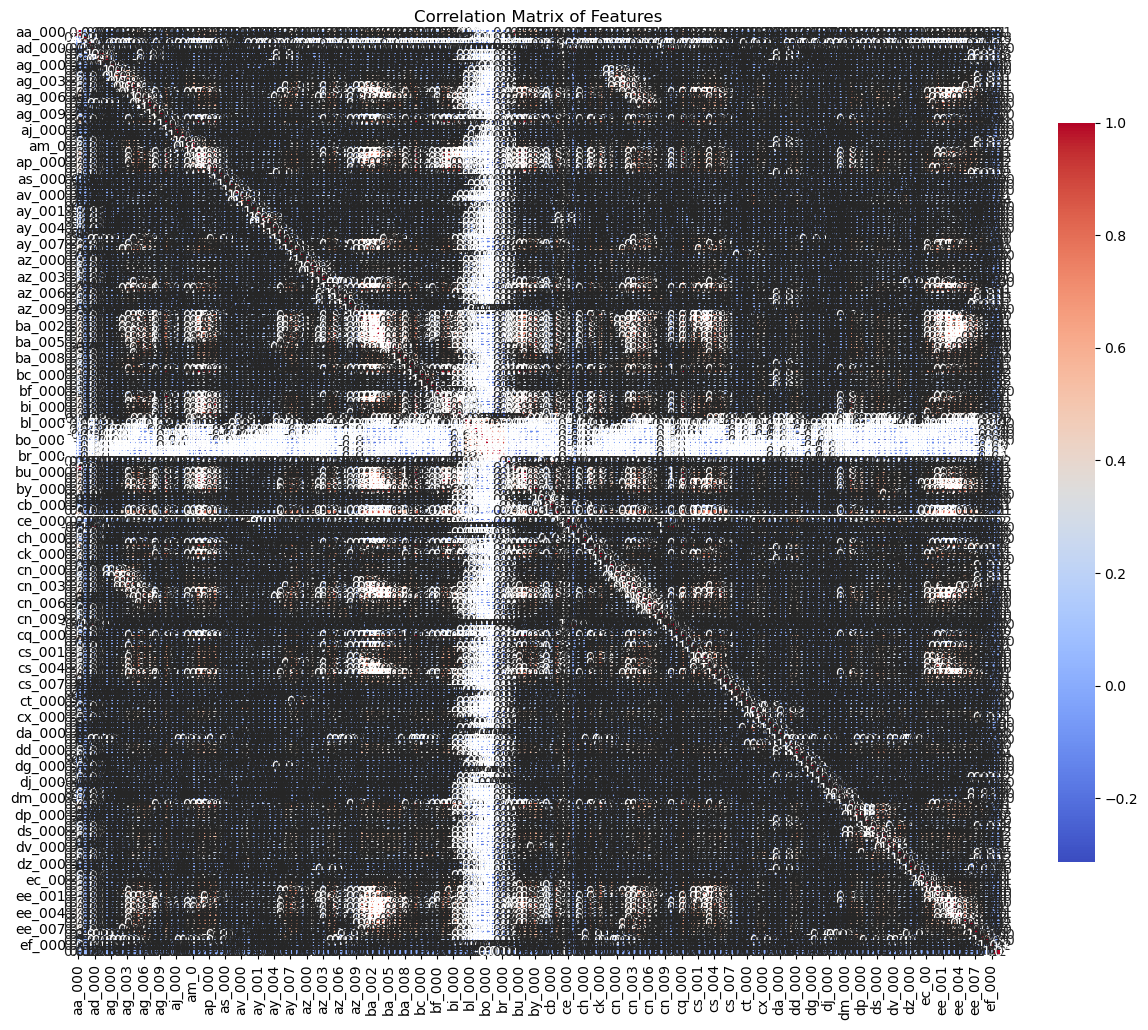

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_combined[numeric_columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Features")
plt.show()

iv. Pick ⌊√170⌋ features with highest CV, and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. 

In [5]:
# choose the top √170=13 features with highest CV
top_cv_features = cv.nlargest(13).index

print("Top 13 Features with Highest CV:")
print(top_cv_features)

Top 13 Features with Highest CV:
Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'df_000', 'as_000',
       'dh_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')


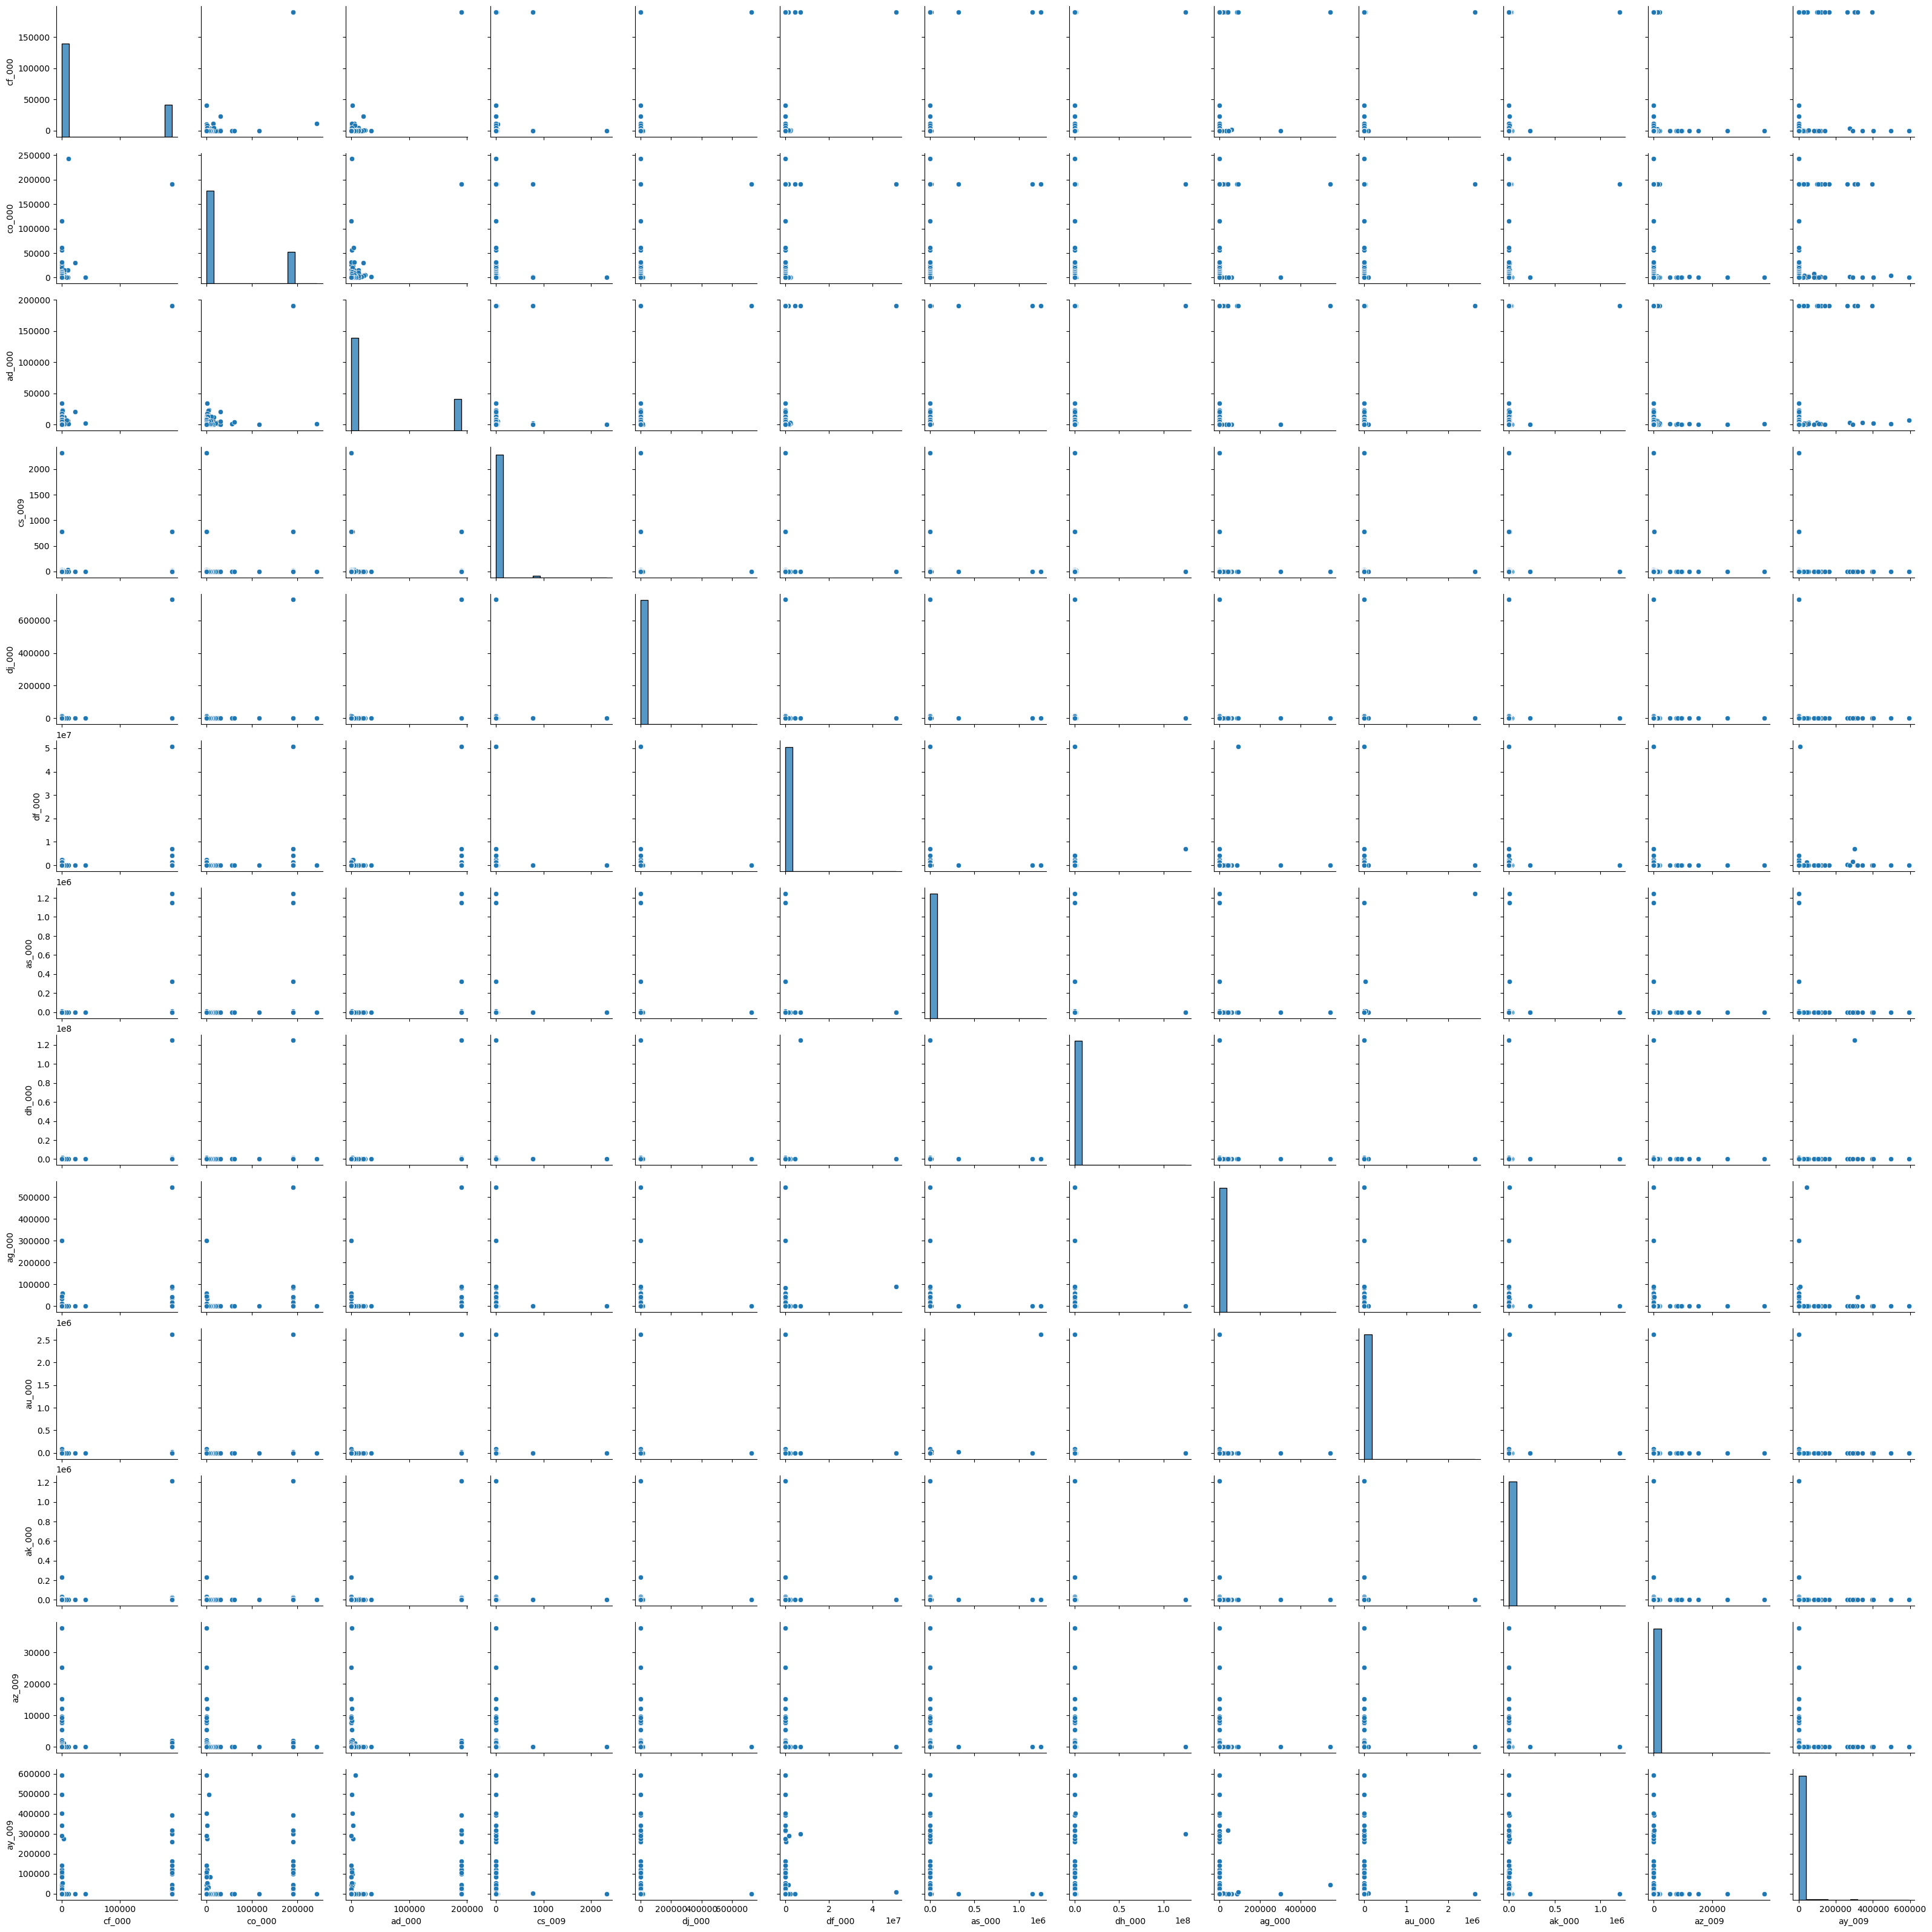

In [6]:
# Reset the index to ensure there are no duplicate index labels
data_combined_reset = data_combined.reset_index(drop=True)
# Sample 10,000 rows from the data for visualization to reduce computational load
data_sampled = data_combined_reset.sample(n=10000, random_state=42)

# Create a pairplot for the selected features (with a smaller dataset)
sns.pairplot(data_sampled[top_cv_features])
plt.show()

From the scatter plots alone, it is challenging to determine the significance of the features. 

v. Determine the number of positive and negative data. Is this data set imbal-
anced?

In [7]:
# Check the distribution of the target class
class_counts = data_combined['class'].value_counts()

# Display the counts for positive and negative classes
print(class_counts)

class
neg    74625
pos     1375
Name: count, dtype: int64


This indicates that the dataset is highly imbalanced, with a much larger number of negative instances compared to positive ones. 

(c) Train a random forest to classify the data set.

Confusion Matrix - Training Set:
[[59000     0]
 [    1   999]]

Confusion Matrix - Test Set:
[[15609    16]
 [  107   268]]

Misclassification Rate - Training Set: 0.0000
Misclassification Rate - Test Set: 0.0077

AUC - Training Set: 1.0000
AUC - Test Set: 0.9942

Out-of-Bag (OOB) Error Estimate: 0.0060
Test Set Error: 0.0077


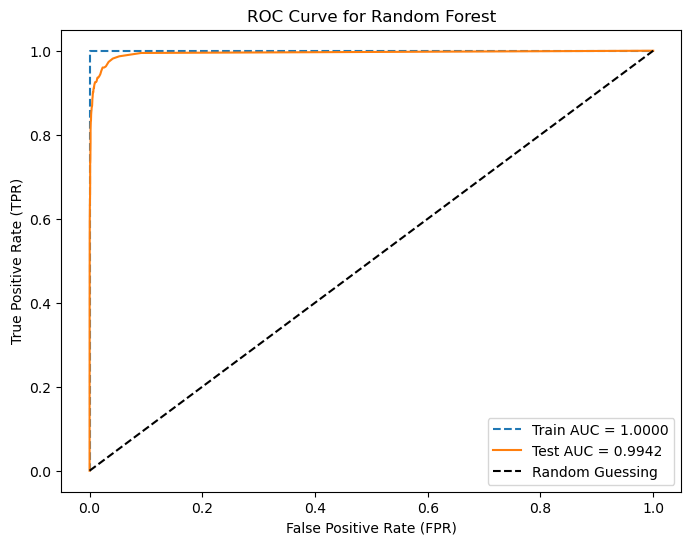

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Separate features (X) and target (y)
X_train = train_data_imputed.drop(columns=['class'])  # Drop the class column for features
y_train = train_data_imputed['class']  # Target variable

X_test = test_data_imputed.drop(columns=['class'])
y_test = test_data_imputed['class']

# Convert labels 'neg' and 'pos' to 0 and 1
y_train_binary = y_train.map({'neg': 0, 'pos': 1})
y_test_binary = y_test.map({'neg': 0, 'pos': 1})

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train_binary)

# Predicting on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train_binary, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_binary, y_test_pred)

print("Confusion Matrix - Training Set:")
print(conf_matrix_train)

print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

# Calculate accuracy
train_misclassification = 1 - accuracy_score(y_train_binary, y_train_pred)
test_misclassification = 1 - accuracy_score(y_test_binary, y_test_pred)

print(f"\nMisclassification Rate - Training Set: {train_misclassification:.4f}")
print(f"Misclassification Rate - Test Set: {test_misclassification:.4f}")

# Calculate ROC curve and AUC
y_train_prob = rf.predict_proba(X_train)[:, 1] 
y_test_prob = rf.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_prob, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_prob, pos_label=1)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

print(f"\nAUC - Training Set: {auc_train:.4f}")
print(f"AUC - Test Set: {auc_test:.4f}")

# OOB Error Estimate
oob_error = 1 - rf.oob_score_
test_error = 1 - accuracy_score(y_test_binary, y_test_pred)

print(f"\nOut-of-Bag (OOB) Error Estimate: {oob_error:.4f}")
print(f"Test Set Error: {test_error:.4f}")

# Draw ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.4f}", linestyle='--')
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.4f}", linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

The small difference suggests that the Random Forest model is generalizing well to unseen data. The OOB error is a reliable proxy for test error, meaning no severe overfitting occurred.

(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

Confusion Matrix (Training Set):
[[59000     0]
 [    1   999]]
Confusion Matrix (Test Set):
[[15613    12]
 [  166   209]]

AUC (Training Set): 1.0000
AUC (Test Set): 0.9865

Misclassification Rate (Training Set): 0.0000
Misclassification Rate (Test Set): 0.0111

Out-of-Bag (OOB) Error Estimate: 0.0077


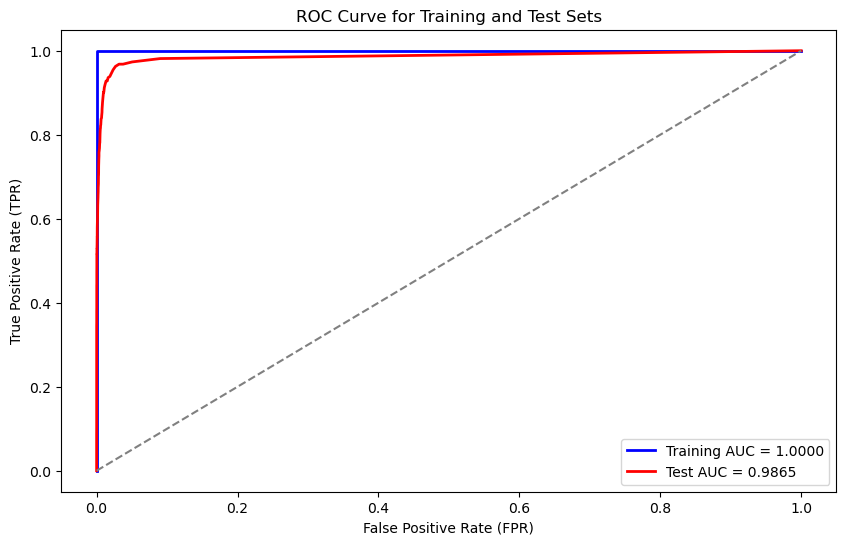

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class imbalance compensation
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', oob_score=True, random_state=42)

# Fit model
rf_balanced.fit(X_train, y_train_binary)

# Make predictions for both training and test sets
y_train_pred = rf_balanced.predict(X_train)
y_test_pred = rf_balanced.predict(X_test)

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train_binary, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_binary, y_test_pred)

# Calculate AUC-ROC for the training and test sets
y_train_prob = rf_balanced.predict_proba(X_train)[:, 1]
y_test_prob = rf_balanced.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate Misclassification Rate
misclassification_train = 1 - accuracy_score(y_train_binary, y_train_pred)
misclassification_test = 1 - accuracy_score(y_test_binary, y_test_pred)

# Extract Out-of-Bag (OOB) error estimate
oob_error = 1 - rf_balanced.oob_score_

# Print results
print(f"Confusion Matrix (Training Set):\n{conf_matrix_train}")
print(f"Confusion Matrix (Test Set):\n{conf_matrix_test}")

print(f"\nAUC (Training Set): {roc_auc_train:.4f}")
print(f"AUC (Test Set): {roc_auc_test:.4f}")

print(f"\nMisclassification Rate (Training Set): {misclassification_train:.4f}")
print(f"Misclassification Rate (Test Set): {misclassification_test:.4f}")

print(f"\nOut-of-Bag (OOB) Error Estimate: {oob_error:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Plot training ROC curve
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training AUC = {roc_auc_train:.4f}')

# Plot testing ROC curve
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test AUC = {roc_auc_test:.4f}')

# Plot diagonal line (chance line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Training and Test Sets')
plt.legend(loc='lower right')

# Show plot
plt.show()

Impact on the Training Set: There is no change in the results on the training set after compensating for class imbalance. The model still classifies perfectly.

Impact on the Test Set: There is a slight decrease in performance after compensating for class imbalance, evident from a decrease in the AUC (from 0.9942 to 0.9865), a slight increase in the misclassification rate (from 0.0077 to 0.0111), and an increase in false negatives and a decrease in true positives in the confusion matrix.

Compensating for class imbalance has a slight negative effect on the model's generalization performance on the test set. However, the impact is minimal, and the model still performs well. The Out-of-Bag error estimate suggests that the model is not overfitting and performs well on unseen data.

(e) XGBoost and Model Trees

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:49:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_en

Best Parameters: {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 7}
Confusion Matrix - Training Set:
 [[59000     0]
 [   16   984]]
Confusion Matrix - Test Set:
 [[15608    17]
 [   93   282]]
AUC - Training Set: 0.9999699237288135
AUC - Test Set: 0.995824128

Classification Report - Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      0.98      0.99      1000

    accuracy                           1.00     60000
   macro avg       1.00      0.99      1.00     60000
weighted avg       1.00      1.00      1.00     60000


Classification Report - Test Set:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.75      0.84       375

    accuracy                           0.99     16000
   macro avg       0.97      0.88      0.92     16000
weighted avg       0.99      0.99      0.99     16000



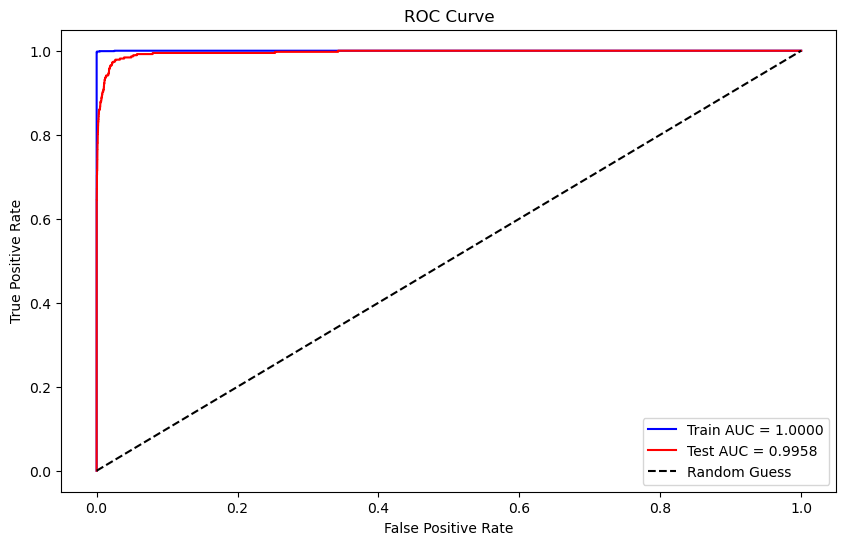

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # L1 regularization parameter
    'max_depth': [3, 5, 7],  # Maximum depth of the decision tree
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

grid_search = GridSearchCV(xgb_clf, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_binary)

# Train the best model found in grid search
best_params = grid_search.best_params_
best_xgb = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
best_xgb.fit(X_train, y_train_binary)

# Make predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

y_train_prob = best_xgb.predict_proba(X_train)[:, 1]
y_test_prob = best_xgb.predict_proba(X_test)[:, 1]

# Compute confusion matrices
cm_train = confusion_matrix(y_train_binary, y_train_pred)
cm_test = confusion_matrix(y_test_binary, y_test_pred)

# Compute ROC and AUC
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Print results
print("Best Parameters:", best_params)
print("Confusion Matrix - Training Set:\n", cm_train)
print("Confusion Matrix - Test Set:\n", cm_test)
print("AUC - Training Set:", roc_auc_train)
print("AUC - Test Set:", roc_auc_test)
print("\nClassification Report - Training Set:\n", classification_report(y_train_binary, y_train_pred))
print("\nClassification Report - Test Set:\n", classification_report(y_test_binary, y_test_pred))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.4f}', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/starfish/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_en

Best Parameters (SMOTE Applied): {'alpha': 1, 'learning_rate': 0.2, 'max_depth': 7}
Confusion Matrix - Training Set (SMOTE Applied):
 [[59000     0]
 [    3 58997]]
Confusion Matrix - Test Set (SMOTE Applied):
 [[15569    56]
 [   61   314]]
AUC - Training Set (SMOTE Applied): 0.9999998741740879
AUC - Test Set (SMOTE Applied): 0.9940840106666667

Classification Report - Training Set (SMOTE Applied):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00     59000

    accuracy                           1.00    118000
   macro avg       1.00      1.00      1.00    118000
weighted avg       1.00      1.00      1.00    118000


Classification Report - Test Set (SMOTE Applied):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.85      0.84      0.84       375

    accuracy                           0.99     16000

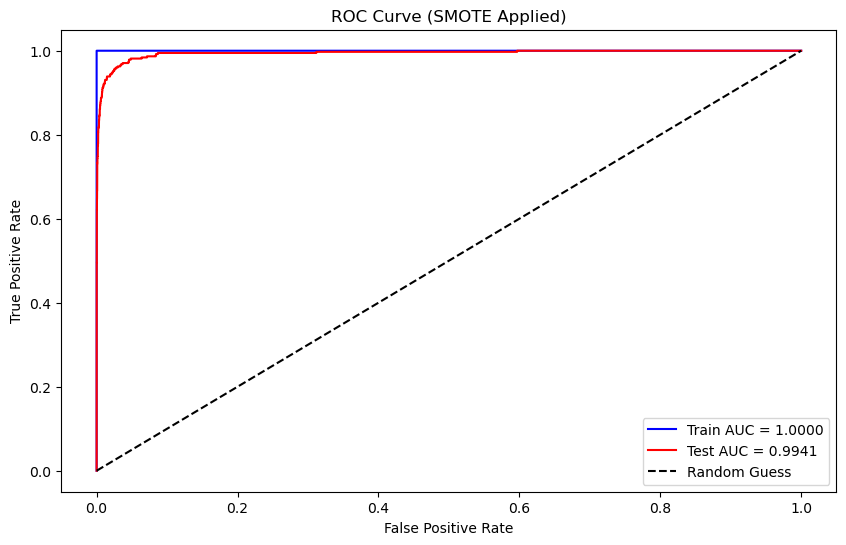

In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training set (do not apply it to the test set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_binary)

# Convert data to XGBoost DMatrix format
dtrain_smote = xgb.DMatrix(X_train_smote, label=y_train_smote)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # L1 regularization parameter
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Perform cross-validation on SMOTE-applied dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_clf_smote = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

grid_search_smote = GridSearchCV(xgb_clf_smote, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
grid_search_smote.fit(X_train_smote, y_train_smote)

# Train the best model found in grid search
best_params_smote = grid_search_smote.best_params_
best_xgb_smote = xgb.XGBClassifier(**best_params_smote, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
best_xgb_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_train_smote_pred = best_xgb_smote.predict(X_train_smote)
y_test_pred = best_xgb_smote.predict(X_test)

y_train_smote_prob = best_xgb_smote.predict_proba(X_train_smote)[:, 1]
y_test_prob = best_xgb_smote.predict_proba(X_test)[:, 1]

# Compute confusion matrices
cm_train_smote = confusion_matrix(y_train_smote, y_train_smote_pred)
cm_test_smote = confusion_matrix(y_test_binary, y_test_pred)

# Compute ROC and AUC
fpr_train_smote, tpr_train_smote, _ = roc_curve(y_train_smote, y_train_smote_prob)
fpr_test_smote, tpr_test_smote, _ = roc_curve(y_test_binary, y_test_prob)

roc_auc_train_smote = auc(fpr_train_smote, tpr_train_smote)
roc_auc_test_smote = auc(fpr_test_smote, tpr_test_smote)

# Print results
print("Best Parameters (SMOTE Applied):", best_params_smote)
print("Confusion Matrix - Training Set (SMOTE Applied):\n", cm_train_smote)
print("Confusion Matrix - Test Set (SMOTE Applied):\n", cm_test_smote)
print("AUC - Training Set (SMOTE Applied):", roc_auc_train_smote)
print("AUC - Test Set (SMOTE Applied):", roc_auc_test_smote)
print("\nClassification Report - Training Set (SMOTE Applied):\n", classification_report(y_train_smote, y_train_smote_pred))
print("\nClassification Report - Test Set (SMOTE Applied):\n", classification_report(y_test_binary, y_test_pred))

# Plot ROC Curve (SMOTE Applied)
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_smote, tpr_train_smote, label=f'Train AUC = {roc_auc_train_smote:.4f}', color='blue')
plt.plot(fpr_test_smote, tpr_test_smote, label=f'Test AUC = {roc_auc_test_smote:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE Applied)')
plt.legend()
plt.show()

Both models achieve very high accuracy (~99%) and AUC (>0.99), indicating strong classification performance. The SMOTE model significantly improves recall for the failure class (75% → 84%), meaning fewer actual failures are missed. The uncompensated model has higher precision (94% vs. 85%) but at the cost of missing more failures (higher false negatives). The SMOTE model reduces false negatives (93 → 61), which is crucial in failure detection where missing an issue is costly.

##### ***ISLR 6.6.3*** Suppose we estimate the regression coeﬀicients in a linear regression model by minimizing  
##### $\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2$ **subject to** $\sum_{j=1}^{p} |\beta_j| \leq s$  
##### for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.  

(a) As we increase s from 0, the training RSS will:  
i. Increase initially, and then eventually start decreasing in an inverted U shape.  
ii. Decrease initially, and then eventually start increasing in a U shape.  
iii. Steadily increase.  
iv. Steadily decrease.  
v. Remain constant.  
(b) Repeat (a) for test RSS.  
(c) Repeat (a) for variance.  
(d) Repeat (a) for (squared) bias.  
(e) Repeat (a) for the irreducible error.

##### (a) Effect on Training RSS  

As 𝑠 increases, the constraint on the coefficients becomes weaker, allowing the model to fit the training data better. This means:
When 𝑠 is small, the model is highly constrained, leading to a high Training RSS. As 𝑠 increases, the model fits better, and the Training RSS decreases. Since we are dealing with Lasso, there is no reason for Training RSS to increase after a certain point—it will always decrease as the constraint is relaxed.  

Answer: (iv) Steadily decrease.

##### (b) Effect on Test RSS  

For test data: When 𝑠 is very small (high regularization), the model is too simple and underfits, leading to high Test RSS. As 𝑠 increases, the model fits better, and the Test RSS decreases initially. If 𝑠 becomes too large (low regularization), the model overfits the training data and loses generalization ability, causing Test RSS to increase again. This means Test RSS follows a U-shaped curve.  

Answer: (ii) Decrease initially, and then eventually start increasing in a U shape.

##### (c) Effect on Variance  

When 𝑠 is small, the model is simple, and the variance is low. As 𝑠 increases, the model becomes more flexible, leading to higher variance since it starts capturing noise. Thus, variance steadily increases as 𝑠 increases.

Answer: (iii) Steadily increase.

##### (d) Effect on Squared Bias  

When 𝑠 is small, the model is highly constrained and cannot capture patterns well, leading to high bias. As 𝑠 increases, the bias decreases because the model fits the data better. If 𝑠 keeps increasing, bias will keep decreasing, but it will not increase again.

Answer: (iv) Steadily decrease.

##### (e) Effect on Irreducible Error  

The irreducible error is caused by random noise in the data and cannot be reduced by the model. Changing 𝑠 does not affect this noise.

Answer: (v) Remain constant.

##### ***ISLR 6.6.5*** It is well-known that ridge regression tends to give similar coeﬀicient values to correlated variables, whereas the lasso may give quite different coeﬀicient values to correlated variables. We will now explore this property in a very simple setting.
##### Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1 + y2 = 0 and x11 + x21 = 0 and x12 + x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$.

(a) Write out the ridge regression optimization problem in this setting.  
(b) Argue that in this setting, the ridge coeﬀicient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.  
(c) Write out the lasso optimization problem in this setting.  
(d) Argue that in this setting, the lasso coeﬀicients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

##### (a) Ridge Regression Optimization Problem
The ridge regression optimization problem is given by:
$
\min_{\beta_1, \beta_2} \sum_{i=1}^{2} \left( y_i - \beta_1 x_{i1} - \beta_2 x_{i2} \right)^2 + \lambda (\beta_1^2 + \beta_2^2)
$
##### (b) Ridge Regression Coefficient Estimates
Since $x_{11} = x_{12}$ and $x_{21} = x_{22}$, we can rewrite the ridge regression objective function as:
$\min_{\beta_1, \beta_2} \sum_{i=1}^{2} \left( y_i - ( \beta_1 + \beta_2 ) x_{i1} \right)^2 + \lambda (\beta_1^2 + \beta_2^2)$
Since the penalty term depends on $\beta_1$ and $\beta_2$ symmetrically, and the squared loss term only depends on their sum, the optimal solution must satisfy:
$\hat{\beta}_1 = \hat{\beta}_2$
##### (c) Lasso Optimization Problem
The lasso optimization problem in this setting is:
$\min_{\beta_1, \beta_2} \sum_{i=1}^{2} \left( y_i - \beta_1 x_{i1} - \beta_2 x_{i2} \right)^2 + \lambda (|\beta_1| + |\beta_2|)$
##### (d) Non-Uniqueness of Lasso Coefficients
Since $x_{11} = x_{12}$ and $x_{21} = x_{22}$, we can rewrite the lasso objective function as:
$\min_{\beta_1, \beta_2} \sum_{i=1}^{2} \left( y_i - (\beta_1 + \beta_2) x_{i1} \right)^2 + \lambda (|\beta_1| + |\beta_2|)$
Here, the loss function only depends on the sum $\beta_1 + \beta_2$, but the L1 penalty treats $\beta_1$ and $\beta_2$ separately. This means that there are infinitely many possible solutions where: $|\hat{\beta}_1| + |\hat{\beta}_2| = C$ for some constant C, meaning that $\hat{\beta}_1$ and $\hat{\beta}_2$ could take different values while still minimizing the objective function. This non-uniqueness arises due to the absolute value penalty, which does not favor equal shrinkage as in ridge regression.

##### ***ISLR 8.4.5*** Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P (Class is Red|X):
##### 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
##### There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

##### 1. Majority Vote Approach
Each model classifies the class independently based on whether $P(\text{Red} | X) > 0.5$.  
| Probability | Classification |
|------------|---------------|
| 0.1  | Green  |
| 0.15 | Green  |
| 0.2  | Green  |
| 0.2  | Green  |
| 0.55 | Red    |
| 0.6  | Red    |
| 0.6  | Red    |
| 0.65 | Red    |
| 0.7  | Red    |
| 0.75 | Red    |

**Green:** 4 votes  
**Red:** 6 votes  

Since "Red" has the majority, the **final classification under the majority vote approach is "Red".**  

##### 2. Average Probability Approach
We compute the average probability:

$\frac{0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75}{10} = \frac{4.5}{10} = 0.45$

Since **0.45 < 0.5**, we classify the final result as **"Green".**

##### ***ISLR 9.7.3*** Here we explore the maximal margin classifier on a toy data set.
(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
| Obs. | X1 | X2 | Y    |
|------|----|----|------|
| 1    | 3  | 4  | Red  |
| 2    | 2  | 2  | Red  |
| 3    | 4  | 4  | Red  |
| 4    | 1  | 4  | Red  |
| 5    | 2  | 1  | Blue |
| 6    | 4  | 3  | Blue |
| 7    | 4  | 1  | Blue |

Sketch the observations.  
(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).  
(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.  
(d) On your sketch, indicate the margin for the maximal margin hyperplane.  
(e) Indicate the support vectors for the maximal margin classifier.  
(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.  
(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.  
(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

(a) Sketch the observations.

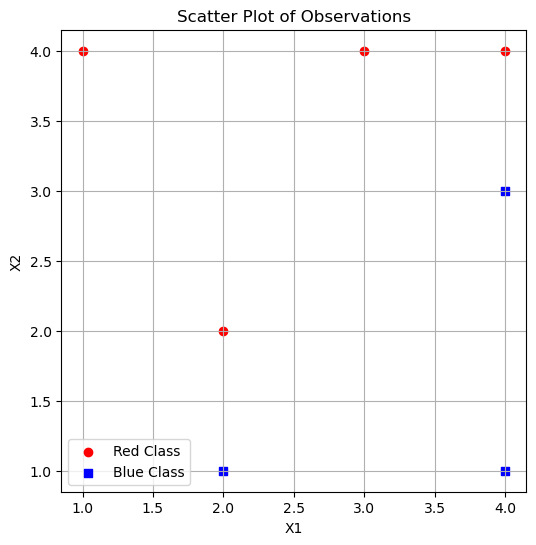

In [12]:
import matplotlib.pyplot as plt

# Sample data for visualization
red_points = [(3, 4), (2, 2), (4, 4), (1, 4)]
blue_points = [(2, 1), (4, 3), (4, 1)]
red_x, red_y = zip(*red_points)
blue_x, blue_y = zip(*blue_points)

# Create scatter plot
plt.figure(figsize=(6,6))
plt.scatter(red_x, red_y, color='red', label='Red Class', marker='o')
plt.scatter(blue_x, blue_y, color='blue', label='Blue Class', marker='s')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Observations')
plt.legend()
plt.grid(True)
plt.show()

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane.

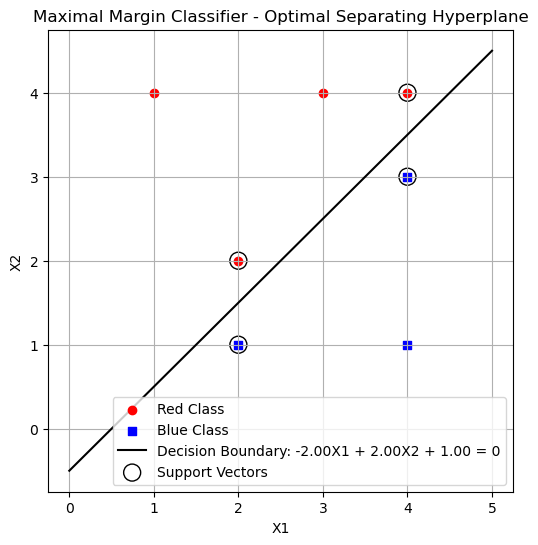

Equation of the optimal hyperplane: -2.00X1 + 2.00X2 + 1.00 = 0


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Sample data for maximal margin classifier
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
y = np.array([1, 1, 1, 1, -1, -1, -1])  # Red = 1, Blue = -1
svm = SVC(kernel='linear', C=1e6)
svm.fit(X, y)
b0 = svm.intercept_[0]
b1, b2 = svm.coef_[0]

# Create a scatter plot of the data points
plt.figure(figsize=(6,6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', label='Red Class')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', marker='s', label='Blue Class')

x_vals = np.linspace(0, 5, 100)
y_vals = -(b0 + b1*x_vals) / b2

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'k-', label=f'Decision Boundary: {b1:.2f}X1 + {b2:.2f}X2 + {b0:.2f} = 0')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Maximal Margin Classifier - Optimal Separating Hyperplane')
plt.legend()
plt.grid(True)
plt.show()

# Print the hyperplane equation
print(f'Equation of the optimal hyperplane: {b1:.2f}X1 + {b2:.2f}X2 + {b0:.2f} = 0')

(c) Describe the classification rule for the maximal margin classifier.  
The **classification decision rule** is:  
$\text{Classify as Red if } -2.00X_1 + 2.00X_2 + 1.00 > 0, \text{ otherwise classify as Blue}$.

(d) On your sketch, indicate the margin for the maximal margin hyperplane.  
The margin is the distance between the optimal hyperplane (decision boundary) and the closest points from either class (support vectors).  
For the equation of the hyperplane: $-2.00X_1 + 2.00X_2 + 1.00 = 0$  
The margin is calculated as: $\text{Margin} = \frac{1}{\sqrt{\beta_1^2 + \beta_2^2}} = \frac{1}{\sqrt{(-2.00)^2 + 2.00^2}} = \frac{1}{\sqrt{8}} \approx 0.3536$

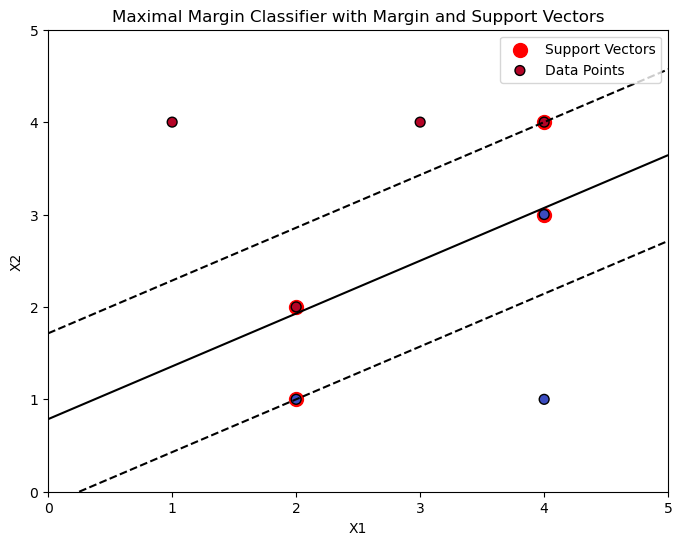

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])  # Feature matrix
y = np.array([1, 1, 1, 1, -1, -1, -1])  # Class labels: 1 -> Red, -1 -> Blue

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(0, 5, 30), np.linspace(0, 5, 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='red', marker='o', label='Support Vectors')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label='Data Points')
plt.title('Maximal Margin Classifier with Margin and Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.  
The support vectors are points (2,1), (2,2), (4,3) and (4,4).

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.  
The seventh observation (i.e., the point (4,1), which is "Blue") is not a support vector for the optimal hyperplane. This is because it is not located at the margin, and the support vectors are the critical points that determine the hyperplane's position. When a non-support vector (such as the seventh observation) is slightly moved, it will not affect the margin or the decision boundary because it is not close enough to the margin to influence the position of the hyperplane.

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

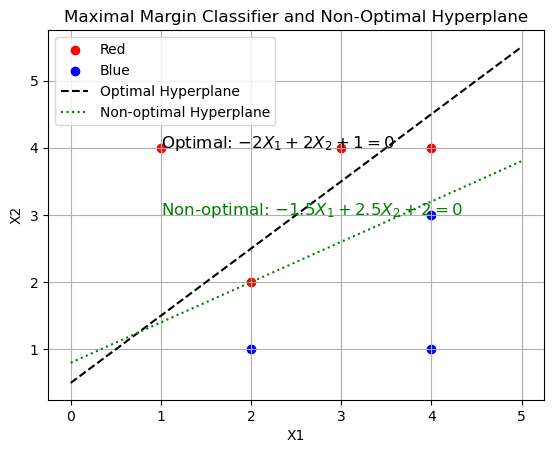

Equation of the optimal hyperplane: -2X1 + 2X2 + 1 = 0
Equation of the non-optimal hyperplane: -1.5X1 + 2.5X2 + 2 = 0


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data points for Red and Blue classes
X_red = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
X_blue = np.array([[2, 1], [4, 3], [4, 1]])

# Plotting the points
plt.scatter(X_red[:, 0], X_red[:, 1], color='red', label='Red')
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Blue')

# Define the optimal hyperplane (-2X1 + 2X2 + 1 = 0)
def optimal_hyperplane(X1):
    return (2 * X1 + 1) / 2

# Define the non-optimal hyperplane (-1.5X1 + 2.5X2 + 2 = 0)
def non_optimal_hyperplane(X1):
    return (1.5 * X1 + 2) / 2.5

# Plot the optimal and non-optimal hyperplanes
X1_values = np.linspace(0, 5, 100)
plt.plot(X1_values, optimal_hyperplane(X1_values), label="Optimal Hyperplane", color="black", linestyle="--")
plt.plot(X1_values, non_optimal_hyperplane(X1_values), label="Non-optimal Hyperplane", color="green", linestyle=":")

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Maximal Margin Classifier and Non-Optimal Hyperplane')

# Add equation text for both hyperplanes
plt.text(1, 4, r'Optimal: $-2X_1 + 2X_2 + 1 = 0$', fontsize=12, color='black')
plt.text(1, 3, r'Non-optimal: $-1.5X_1 + 2.5X_2 + 2 = 0$', fontsize=12, color='green')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the equations for clarity
print("Equation of the optimal hyperplane: -2X1 + 2X2 + 1 = 0")
print("Equation of the non-optimal hyperplane: -1.5X1 + 2.5X2 + 2 = 0")


(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

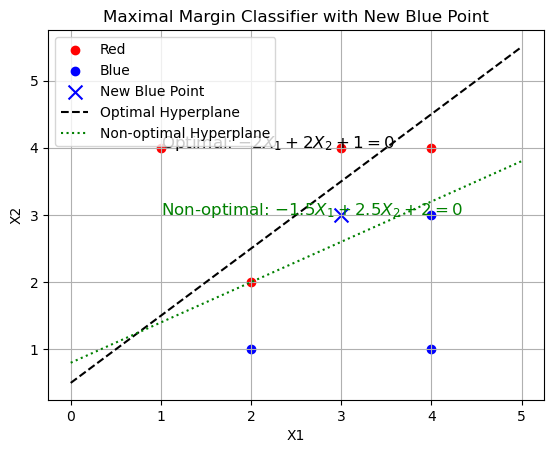

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Original data points for Red and Blue classes
X_red = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
X_blue = np.array([[2, 1], [4, 3], [4, 1]])

# New additional blue point
X_new_blue = np.array([[3, 3]])

# Plotting the original points
plt.scatter(X_red[:, 0], X_red[:, 1], color='red', label='Red')
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Blue')

# Plot the new additional blue point
plt.scatter(X_new_blue[:, 0], X_new_blue[:, 1], color='blue', marker='x', s=100, label='New Blue Point')

# Define the optimal hyperplane (-2X1 + 2X2 + 1 = 0)
def optimal_hyperplane(X1):
    return (2 * X1 + 1) / 2

# Define the non-optimal hyperplane (-1.5X1 + 2.5X2 + 2 = 0)
def non_optimal_hyperplane(X1):
    return (1.5 * X1 + 2) / 2.5

# Plot the optimal and non-optimal hyperplanes
X1_values = np.linspace(0, 5, 100)
plt.plot(X1_values, optimal_hyperplane(X1_values), label="Optimal Hyperplane", color="black", linestyle="--")
plt.plot(X1_values, non_optimal_hyperplane(X1_values), label="Non-optimal Hyperplane", color="green", linestyle=":")

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Maximal Margin Classifier with New Blue Point')

# Add equation text for both hyperplanes
plt.text(1, 4, r'Optimal: $-2X_1 + 2X_2 + 1 = 0$', fontsize=12, color='black')
plt.text(1, 3, r'Non-optimal: $-1.5X_1 + 2.5X_2 + 2 = 0$', fontsize=12, color='green')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
